In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()


In [5]:
raw_csv_data = pd.read_csv("files/index2018.csv")
df_comp = raw_csv_data.copy()

In [6]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [7]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [8]:
df_comp.date.describe()

count           6269
unique          6269
top       21/05/2015
freq               1
Name: date, dtype: object

In [9]:
df_comp.date=pd.to_datetime(df_comp.date, dayfirst = True)

In [10]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [11]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [12]:
df_comp.set_index("date", inplace = True)

In [13]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [14]:
df_comp.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

In [15]:
df_comp = df_comp.asfreq('b')

In [16]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [17]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [18]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp.spx = df_comp.spx.fillna(method="ffill")

In [20]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [21]:
df_comp.ftse = df_comp.ftse.fillna(method="bfill")

In [22]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [23]:
df_comp.dax = df_comp.dax.fillna(value=df_comp.dax.mean())

In [24]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [25]:
df_comp.nikkei = df_comp.nikkei.fillna(method="bfill")

In [26]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [27]:
df_comp['market_value'] = df_comp.spx

In [28]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.597179,1288.642547
std,487.868210,2752.604984,1145.568370,4043.683038,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10701.130000,992.715221
50%,1233.761241,5774.380000,5663.300000,15030.510000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17860.470000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [29]:
del df_comp['spx']

In [30]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.597179,1288.642547
std,2752.604984,1145.568370,4043.683038,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10701.130000,992.715221
50%,5774.380000,5663.300000,15030.510000,1233.761241
75%,7442.660000,6304.630175,17860.470000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [31]:
del df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [32]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


In [33]:
size = int(len(df_comp)*0.8)   #Training set - "df" , Testing set - "df_test"

In [34]:
df = df_comp.iloc[:size]

In [35]:
df_test = df_comp.iloc[size:]

In [36]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [37]:
df_test.tail()

,market_value
date,
2018-01-23,2839.130362
2018-01-24,2837.544008
2018-01-25,2839.253031
2018-01-26,2872.867839
2018-01-29,2853.528411


In [38]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size=len(df))

In [39]:
df['wn'] = wn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1093.328125
std,292.559287,289.707981
min,438.920000,101.639593
25%,914.620000,901.384606
50%,1144.650000,1096.657515
75%,1316.280729,1287.665100
max,1570.252238,2109.992417


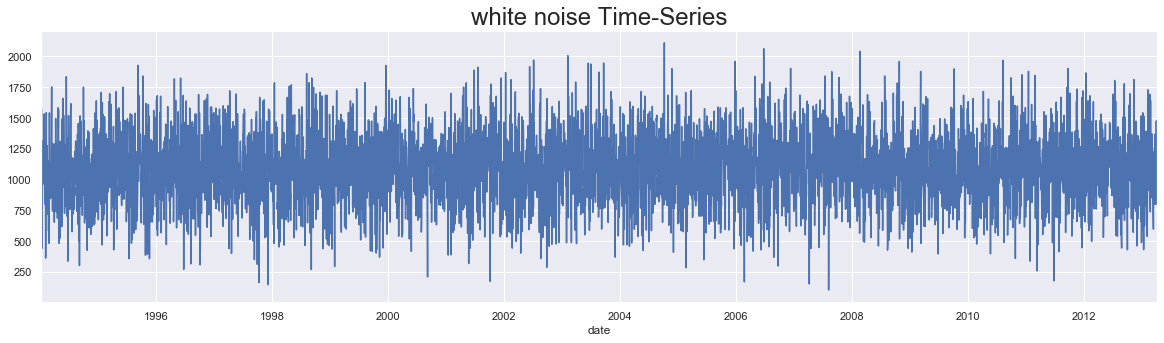

In [41]:
df.wn.plot(figsize = (20,5))
plt.title("white noise Time-Series", size=24)
plt.show()

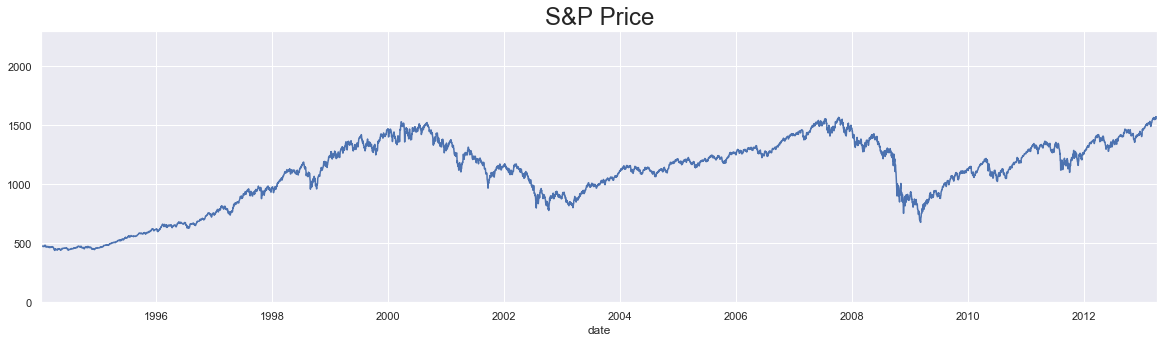

In [42]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Price", size = 24)
plt.ylim(0,2300)
plt.show()

In [43]:
#Random Walk



In [44]:
rw = pd.read_csv("files/RandWalk.csv")

In [45]:
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [46]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [47]:
df['rw'] = rw.price

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,695.727034,1122.139662
1994-01-10,475.27,1571.727778,1080.347860
1994-01-11,474.13,862.294163,1082.095245
1994-01-12,474.17,1251.580620,1083.639265
1994-01-13,472.47,440.195683,1067.146255


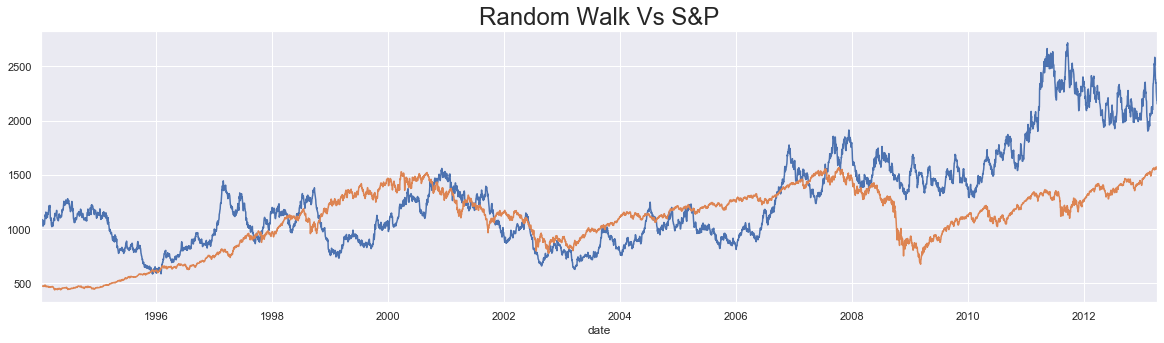

In [49]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk Vs S&P", size = 24)
plt.show()

In [50]:
#Stationarity(Dickey-Fuller test)

In [51]:
sts.adfuller(df.market_value)

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [52]:
sts.adfuller(df.wn)

(-70.05013752868685,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70709.95770461042)

In [53]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

In [54]:
#seasonality (Naive 1.additive 2.Multiplicative) 

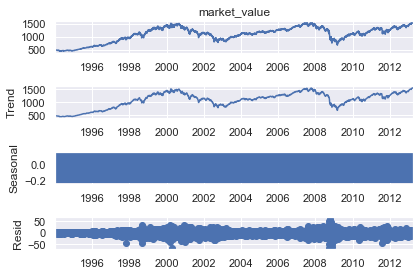

In [55]:
s_dec_additive = seasonal_decompose(df.market_value, model="additive")
s_dec_additive.plot()
plt.show()

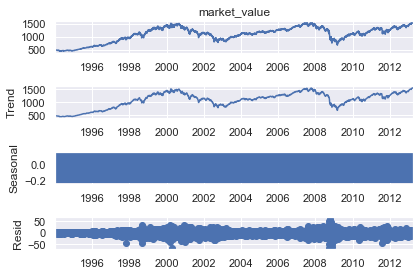

In [56]:
#or we can apply

s_dec_multiplicative = seasonal_decompose(df.market_value, model="Multiplicative")
s_dec_multiplicative.plot()
plt.show()

#no seasonality

In [57]:
#ACF

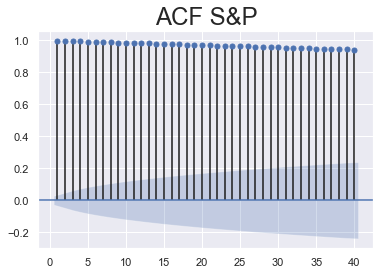

In [58]:

sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

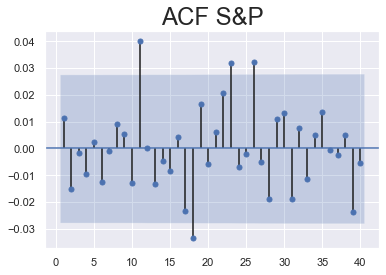

In [59]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

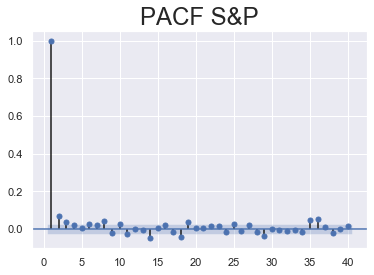

In [61]:
sgt.plot_pacf(df.market_value, lags = 40 ,zero = False, method= ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

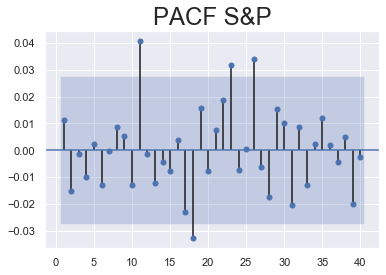

In [62]:
sgt.plot_pacf(df.wn, lags = 40 ,zero = False, method= ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()